In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
test_accuracy = np.load("ResNet/ResNet_test_accuracy.npy")
train_accuracy = np.load("ResNet/ResNet_train_accuracy.npy")

test_loss = np.load("ResNet/ResNet_test_loss.npy")
train_loss = np.load("ResNet/ResNet_train_loss.npy")

FileNotFoundError: [Errno 2] No such file or directory: 'ResNet/ResNet_test_accuracy.npy'

In [ ]:
test_accuracy.shape, train_accuracy.shape

In [ ]:
def draw_line(data, color, label):
    mean = np.mean(data, axis = 0)
    std = np.std(data, axis = 0)
    plt.fill_between(np.arange(test_accuracy.shape[1]), mean+std, mean-std, alpha=.5, color=color)
    plt.plot(mean, color=color, label=label)
    plt.scatter(np.arange(test_accuracy.shape[1]), mean, color=color)


In [ ]:
draw_line(test_accuracy, 'C0', 'Test')
draw_line(train_accuracy, 'C1', 'Train')

plt.title("Accuracy learning curve ResNet50 with oversampling")
plt.ylim((.4, 1.))
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.savefig("figures/Accuracy learning curve ResNet50 with oversampling")

In [ ]:
draw_line(test_loss, 'C0', 'Test')
draw_line(train_loss, 'C1', 'Train')

plt.title("Loss learning curve ResNet50 with oversampling")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.savefig("figures/Loss learning curve ResNet50 with oversampling")

In [ ]:
test_accuracy_mobile = np.load("MobileNetV2/MobileNetV2_test_accuracy.npy")
train_accuracy_mobile = np.load("MobileNetV2/MobileNetV2_train_accuracy.npy")

test_loss_mobile = np.load("MobileNetV2/MobileNetV2_test_loss.npy")
train_loss_mobile = np.load("MobileNetV2/MobileNetV2_train_loss.npy")

In [ ]:
draw_line(test_accuracy_mobile, 'C0', 'Test')
draw_line(train_accuracy_mobile, 'C1', 'Train')

plt.title("Accuracy learning curve MobileNetV2 with oversampling")
plt.ylim((.4, 1.))
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.savefig("figures/Accuracy learning curve MobileNetV2 with oversampling")

In [ ]:
draw_line(test_loss_mobile, 'C0', 'Test')
draw_line(train_loss_mobile, 'C1', 'Train')

plt.title("Loss learning curve MobileNetV2")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.savefig("figures/Loss learning curve MobileNetV2 with oversampling")

In [ ]:
test_accuracy_inception = np.load("Inception3/Inception3_test_accuracy.npy")
train_accuracy_inception = np.load("Inception3/Inception3_train_accuracy.npy")

test_loss_inception = np.load("Inception3/Inception3_test_loss.npy")
train_loss_inception = np.load("Inception3/Inception3_train_loss.npy")

In [ ]:
draw_line(test_accuracy_mobile, 'C0', 'Test')
draw_line(train_accuracy_mobile, 'C1', 'Train')

plt.title("Accuracy learning curve Inception3")
plt.ylim((.4, 1.))
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.savefig("figures/Accuracy learning curve Inception3")

In [ ]:
draw_line(test_loss_mobile, 'C0', 'Test')
draw_line(train_loss_mobile, 'C1', 'Train')

plt.title("Loss learning curve Inception3")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.savefig("figures/Loss learning curve Inception3")

In [7]:
import dataset
import torchvision.transforms as transforms


transform = transforms.Compose([
    # to-tensor
    transforms.ToTensor(),
    # resize
    transforms.Resize(128),
    # center-crop
    transforms.CenterCrop(128),
    # normalize
    # transforms.Normalize([0.4914, 0.4822, 0.4465], [0.2023, 0.1994, 0.2010]),
])

incidents = dataset.IncidentsDataset("Incidents-subset", transform=transform)

In [ ]:
from mpl_toolkits.axes_grid1 import ImageGrid

fig = plt.figure(figsize=(20, 20))
grid = ImageGrid(fig, 111, nrows_ncols=(2, 6), axes_pad=(.3, .3))

images = []

for i in range(2):
    for j in range(6):
        idx = i*6+j
        img = incidents.get_item_with_target(idx, 1)
        grid[idx].imshow(img.permute(1, 2, 0))
        grid[idx].set_title(incidents.labels[idx])
        grid[idx].axis('off')

plt.savefig('figures/example_images')

<AxesSubplot: >

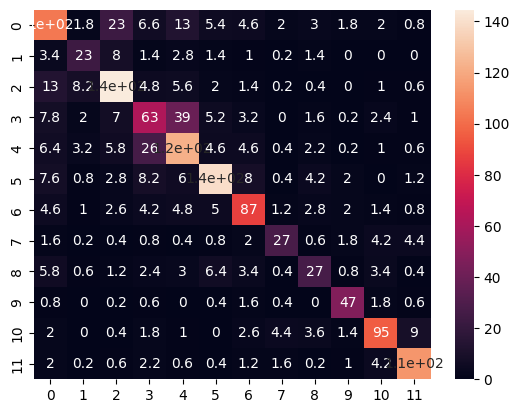

In [93]:
import numpy as np
import seaborn as sns

conf = np.load("Baseline/MobileNetV2/conf_matrix.npy")


sns.heatmap(np.sum(conf, axis=0)/5, annot=True)

In [77]:
len(incidents.targets[incidents.targets == 0])

834

In [78]:
for j in range(5):
    subconf = conf[j][1:, 1:]

    total = 0
    for i in range(11):
        total += subconf[i, i]

    print(total/np.sum(subconf))

0.785022026431718
0.7579672695951766
0.7337133550488599
0.7840290381125227
0.7693693693693694


In [95]:
conf = np.load("Baseline/MobileNetV2/conf_matrix.npy")

subconf = (np.sum(conf, axis=0))[1:, 1:]

total = 0
for i in range(11):
    total += subconf[i, i]

print(total/np.sum(subconf))

0.7538174414658976


In [33]:
total

794